##  Scenario One for Linear Models for Prediction

> This is a scenario for linear models for prediction.   We can choose between linear regression, lasso and ridge regression model what we would like to do is predict the future tax revenues of the state of virginia from a data set of 200 variables and 400 observations.  what should we do?
 
- we know that linear regression models are not good at learning on small data sets so we will choose between lasso and ridge
- we will typically go with ridge as the first choice, however we have a large number of variables so we maybe insterested in using lasso first since it CAN typically predict better with fewer variables
- ridge used L2 regularization, while lasso uses L1 regularization.  

## Scenario 2 for predicting real estate prices

In [3]:
# standard modules we will always use
import pandas as pd
import numpy as np
import scipy as sp
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline



In [17]:
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv("real_estate.csv")
data.columns = ['index','trans_date','age_of_h','dist_mrt','num_of_stores','lat','long','Y_price']
#dispay(data)


In [16]:
X = data[['trans_date','age_of_h','dist_mrt','num_of_stores','lat','long']]
Y = data['Y_price']

/home/adir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


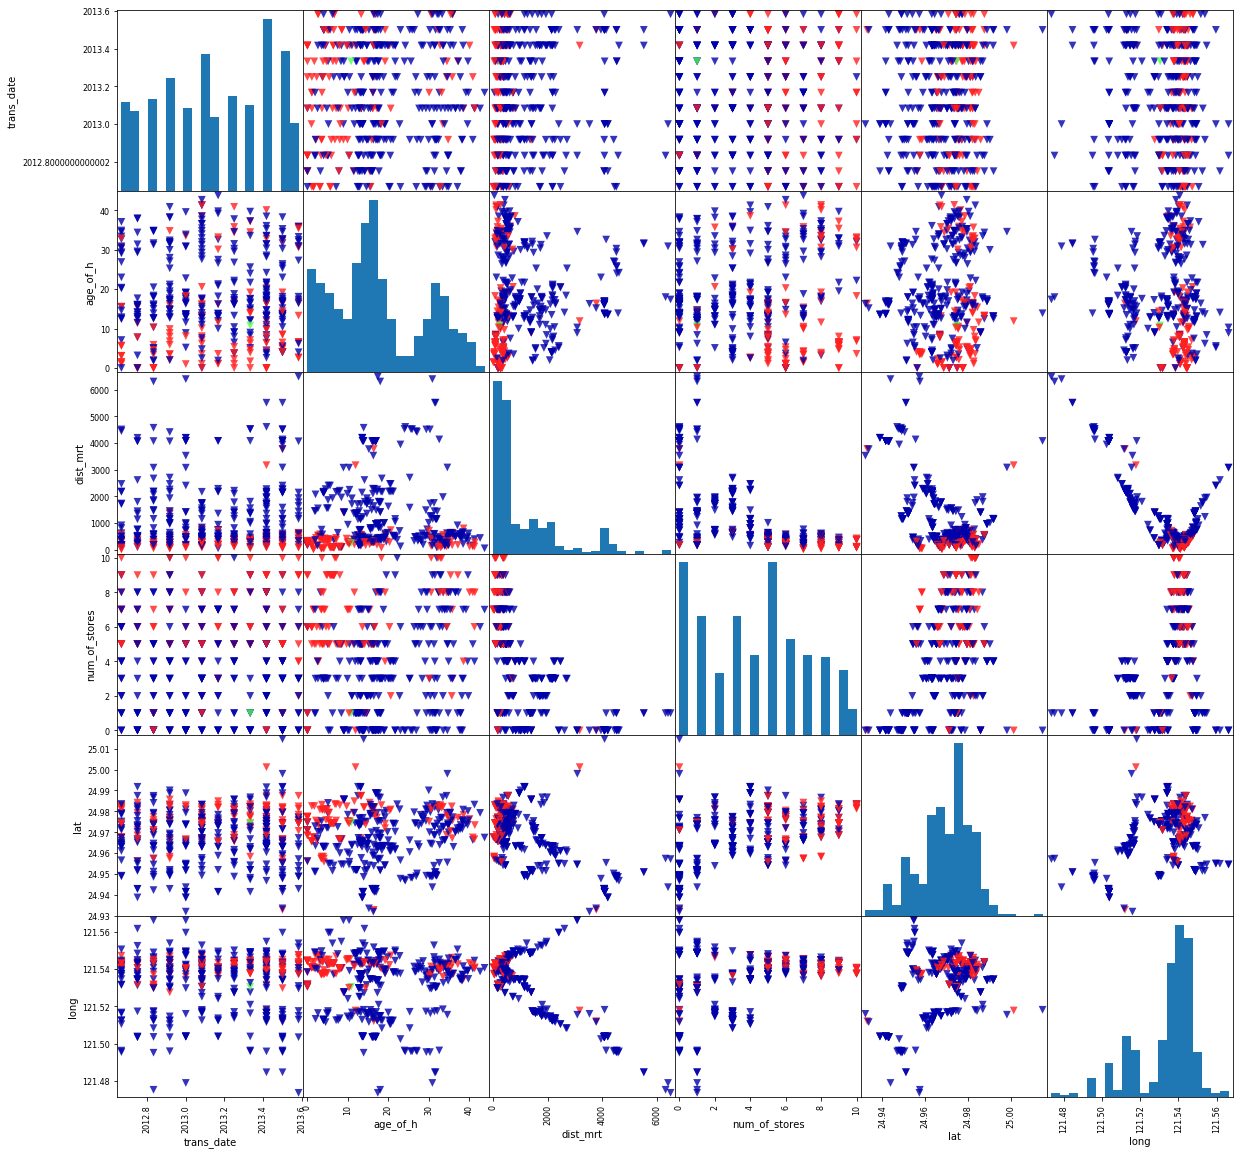

In [23]:
# create a scatter matrix
# the data is not well seperated,  good thing this isn't a classification problem
res = pd.scatter_matrix(X, c=Y, figsize = (20,20), marker ='v',
                       hist_kwds={'bins': 20}, s = 60, alpha = .8, cmap=mglearn.cm3)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42) #random state is to validate the same sequence everytime you run

lr = LinearRegression().fit(X_train,y_train)

In [26]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 5.88480311e+00 -2.66796932e-01 -4.98768211e-03  1.12832133e+00
  2.19404737e+02 -4.31314656e+01]
lr.intercept_: -12039.617736439111


In [27]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.58
Test set score: 0.58


# Analysis? 

This model is underfit and also has an issue with endogeneity in the model.   We will try ridge regression and lasso,
but for exploration, not for regularization, since we are not dealing with an overfitting problem.

In [29]:
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.55
Test set score: 0.56


In [30]:
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test,y_test)))

Training set score: 0.53
Test set score: 0.54


# analysis?

both are close to the original OLS because we went with the default alpha in the regularization function.   we will have to adjust
the alpha to know any difference

In [31]:
ridge = Ridge(alpha = 10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.55
Test set score: 0.56


In [32]:
# increasing alpha forces the coefficients to zero.  because this model was always underfitted we are not noticing much difference
ridge = Ridge(alpha = 100).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.54
Test set score: 0.55


In [33]:
ridge = Ridge(alpha = .01).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.57
Test set score: 0.58


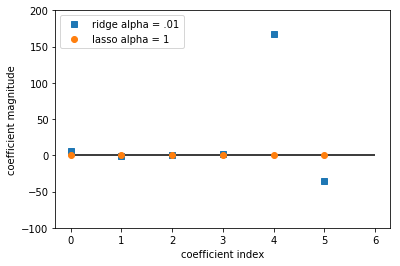

In [35]:
plt.plot(ridge.coef_, 's',label = "ridge alpha = .01")
plt.plot(lasso.coef_,'o', label = 'lasso alpha = 1')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-100,200)
plt.legend()

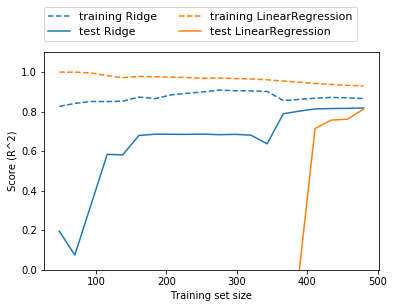

In [36]:
# has nothing to do with the data above
mglearn.plots.plot_ridge_n_samples()